# Simple Linear regression

## 1. Import Libraries

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


print(torch.__version__)

2.1.2


## 2. Creating data

In [2]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

print(f"first five rows of X:\n{X[:5]}")
print(f"first five rows of y:\n{y[:5]}")

first five rows of X:
tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800]])
first five rows of y:
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560]])


In [3]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: torch.Size([50, 1])
y shape: torch.Size([50, 1])


### 2.1 Split data to train and test

In [5]:
train_split = int(0.8 * len(X))
train_split

40

In [7]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test : {X_test.shape}")
print(f"y test : {y_test.shape}")


X train: torch.Size([40, 1])
y train: torch.Size([40, 1])
X test : torch.Size([10, 1])
y test : torch.Size([10, 1])


### 2.2 Plot data

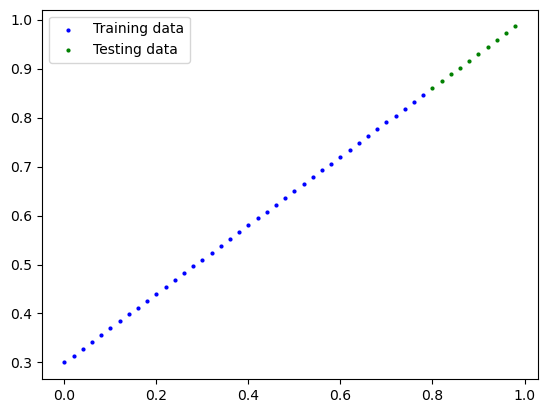

In [8]:
def plot_predictions(
    train_data, train_labels, test_data, test_labels, predictions=None
):
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend()


plot_predictions(X_train, y_train, X_test, y_test)

## 3. Implement the linear regression model

In [16]:
class LinearRegressionModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1)) # requires_grad=True
        self.bias = nn.Parameter(torch.randn(1))    # requires_grad=True

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

### 3.1 loss function and optimizer

In [21]:
torch.manual_seed(42)

model_1 = LinearRegressionModelV1()
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)
print(model_1.state_dict())

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


### 3.2 Train the model


In [22]:
epochs = 300

epoch_count = []
train_loss_values = []
test_loss_values = []

for epoch in range(epochs):
    # Training
    model_1.train()
    y_pred = model_1(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch:4} | Loss: {loss:.4f} | Test loss: {test_loss:.4f}")

print(model_1.state_dict())

Epoch:    0 | Loss: 0.3129 | Test loss: 0.4811
Epoch:   10 | Loss: 0.1977 | Test loss: 0.3464
Epoch:   20 | Loss: 0.0891 | Test loss: 0.2173
Epoch:   30 | Loss: 0.0531 | Test loss: 0.1446
Epoch:   40 | Loss: 0.0454 | Test loss: 0.1136
Epoch:   50 | Loss: 0.0417 | Test loss: 0.0992
Epoch:   60 | Loss: 0.0382 | Test loss: 0.0889
Epoch:   70 | Loss: 0.0348 | Test loss: 0.0806
Epoch:   80 | Loss: 0.0313 | Test loss: 0.0723
Epoch:   90 | Loss: 0.0279 | Test loss: 0.0647
Epoch:  100 | Loss: 0.0245 | Test loss: 0.0565
Epoch:  110 | Loss: 0.0210 | Test loss: 0.0482
Epoch:  120 | Loss: 0.0176 | Test loss: 0.0406
Epoch:  130 | Loss: 0.0142 | Test loss: 0.0323
Epoch:  140 | Loss: 0.0107 | Test loss: 0.0241
Epoch:  150 | Loss: 0.0073 | Test loss: 0.0165
Epoch:  160 | Loss: 0.0039 | Test loss: 0.0082
Epoch:  170 | Loss: 0.0089 | Test loss: 0.0050
Epoch:  180 | Loss: 0.0089 | Test loss: 0.0050
Epoch:  190 | Loss: 0.0089 | Test loss: 0.0050
Epoch:  200 | Loss: 0.0089 | Test loss: 0.0050
Epoch:  210 |

### 3.3 Plot loss curves

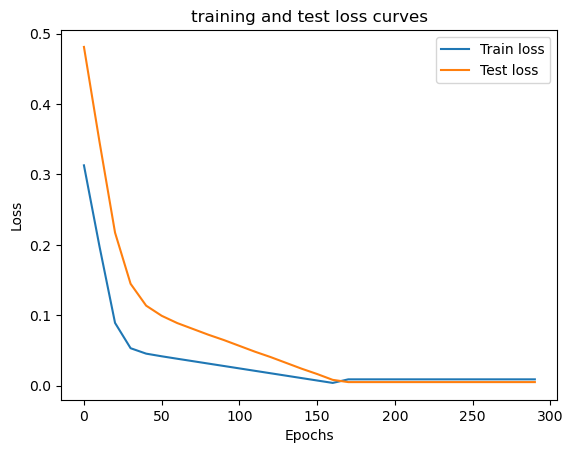

In [23]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("training and test loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

### 3.4 Make Prediction with trained model

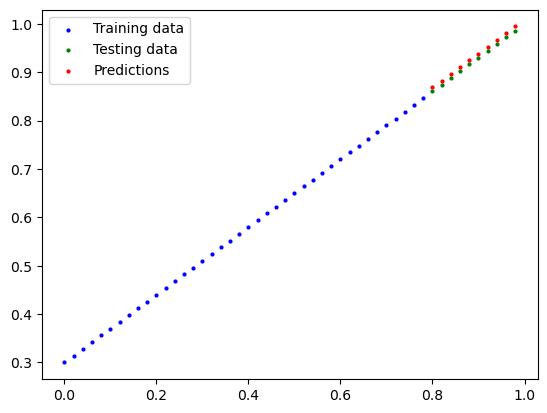

In [24]:
with torch.inference_mode():
    y_preds = model_1(X_test)

plot_predictions(X_train, y_train, X_test, y_test, y_preds)

## 4. Saving a PyTorch model

In [25]:
from pathlib import Path


MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "model_v1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(model_1.state_dict(), MODEL_SAVE_PATH)

Saving model to: models/model_v0.pth


## 5. Loading a PyTorch model

### 5.1 Create a new instance of the model

In [26]:
loaded_model_1 = LinearRegressionModelV1()
print(loaded_model_1.state_dict())

OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])


### 5.2 Load the saved model state

In [27]:
model_state = torch.load(MODEL_SAVE_PATH)
print(model_state)

loaded_model_1.load_state_dict(model_state)
print(loaded_model_1.state_dict())


OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


### 5.3 Make Prediction with loaded model

In [31]:
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_1(X_test)

(loaded_model_preds == y_preds).all()

tensor(True)

---

## 6. Model 2: nn.linear()

In [33]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

### 6.1 loss function and optimizer

In [34]:
torch.manual_seed(42)

model_2 = LinearRegressionModelV2()
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)
print(model_2.state_dict())

OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])


### 3.2 Train the model


In [35]:
epochs = 300

epoch_count = []
train_loss_values = []
test_loss_values = []

for epoch in range(epochs):
    # Training
    model_2.train()
    y_pred = model_2(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Testing
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch:4} | Loss: {loss:.4f} | Test loss: {test_loss:.4f}")

print(model_2.state_dict())

Epoch:    0 | Loss: 0.5552 | Test loss: 0.5740
Epoch:   10 | Loss: 0.4400 | Test loss: 0.4393
Epoch:   20 | Loss: 0.3248 | Test loss: 0.3046
Epoch:   30 | Loss: 0.2095 | Test loss: 0.1698
Epoch:   40 | Loss: 0.0943 | Test loss: 0.0351
Epoch:   50 | Loss: 0.0239 | Test loss: 0.0478
Epoch:   60 | Loss: 0.0200 | Test loss: 0.0458
Epoch:   70 | Loss: 0.0165 | Test loss: 0.0375
Epoch:   80 | Loss: 0.0131 | Test loss: 0.0299
Epoch:   90 | Loss: 0.0097 | Test loss: 0.0217
Epoch:  100 | Loss: 0.0062 | Test loss: 0.0141
Epoch:  110 | Loss: 0.0028 | Test loss: 0.0058
Epoch:  120 | Loss: 0.0013 | Test loss: 0.0138
Epoch:  130 | Loss: 0.0013 | Test loss: 0.0138
Epoch:  140 | Loss: 0.0013 | Test loss: 0.0138
Epoch:  150 | Loss: 0.0013 | Test loss: 0.0138
Epoch:  160 | Loss: 0.0013 | Test loss: 0.0138
Epoch:  170 | Loss: 0.0013 | Test loss: 0.0138
Epoch:  180 | Loss: 0.0013 | Test loss: 0.0138
Epoch:  190 | Loss: 0.0013 | Test loss: 0.0138
Epoch:  200 | Loss: 0.0013 | Test loss: 0.0138
Epoch:  210 |

### 3.3 Plot loss curves

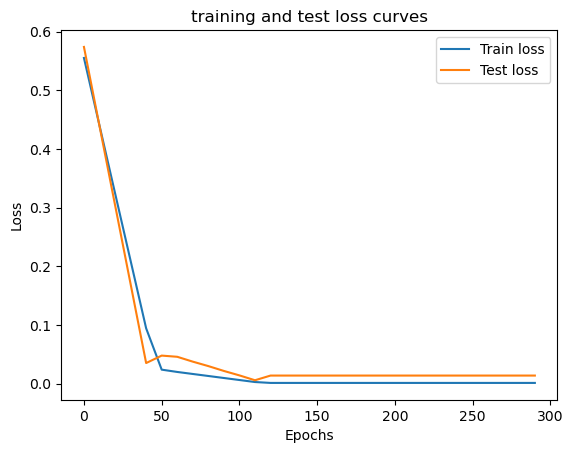

In [36]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("training and test loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

### 3.4 Make Prediction with trained model

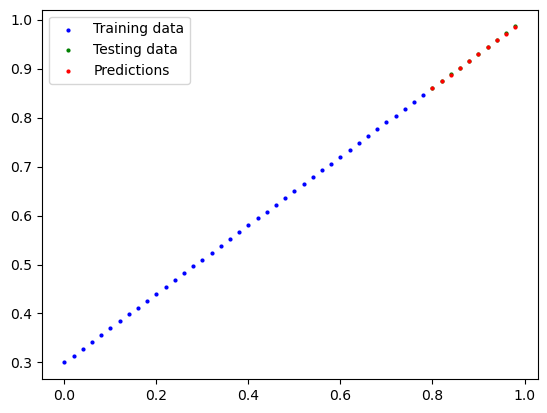

In [37]:
with torch.inference_mode():
    y_preds = model_2(X_test)

plot_predictions(X_train, y_train, X_test, y_test, y_preds)